# Analysis


##### Imports


In [1]:
from pathlib import Path
import json, pandas as pd
import plotly.express as px

RESULTS_DIR = Path("runs") / "results"


In [2]:
files = list(RESULTS_DIR.glob("*_quality.json"))
print("found:", len(files), "files")

rows = []
for fp in files:
    with fp.open() as f:
        row = json.load(f)
    row["engine"] = fp.stem.replace("_quality", "")
    rows.append(row)

df = pd.DataFrame(rows)


found: 14 files


In [3]:
df['success_perc'] = df['success_rate'] * 100
df['engine_name'] = df['engine'].str.replace('_api', '').str.replace('_scraper', '').str.capitalize().str.replace('Scrapingbee','ScrapingBee')


In [4]:
df


,avg_recall,avg_precision,avg_f1,success_rate,engine,success_perc,engine_name
0,0.418981,0.448316,0.428988,0.540000,scrapy_scraper,54.000000,Scrapy
1,0.400046,0.423888,0.408257,0.536653,puppeteer_scraper,53.665284,Puppeteer
2,0.442166,0.466340,0.449829,0.635135,scraperapi_api,63.513514,Scraperapi
3,0.654014,0.658862,0.653395,0.816000,firecrawl_api,81.600000,Firecrawl
4,0.457769,0.487554,0.468174,0.628788,zyte_api,62.878788,Zyte
5,0.506211,0.561197,0.526801,0.763000,exa_api,76.300000,Exa
6,0.331453,0.352773,0.338666,0.395000,playwright_scraper,39.500000,Playwright
7,0.346279,0.377394,0.354953,0.506000,rest_scraper,50.600000,Rest
8,0.498865,0.508261,0.501143,0.676000,tavily_api,67.600000,Tavily
9,0.408899,0.430915,0.416620,0.602151,apify_api,60.215054,Apify


#### Analysis


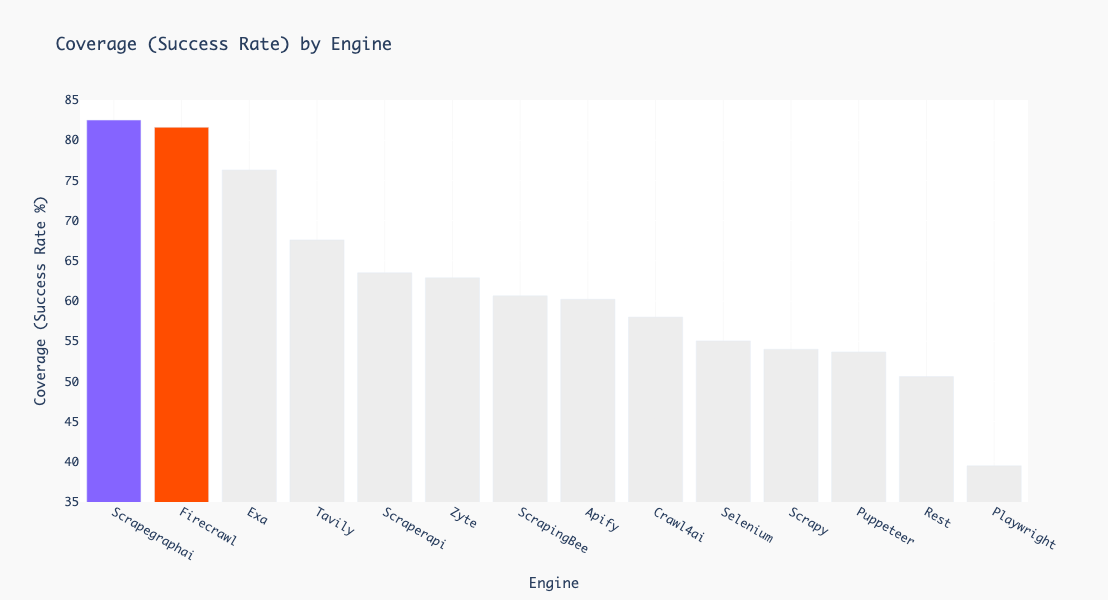

In [7]:
# Coverage (Success Rate) Bar Chart
df_sorted_reach = df.sort_values("success_perc", ascending=False)
colors_engines_map = { "Firecrawl" : "#FF4D00", "Scrapegraphai": "#8564FF" } 
color_map_reach = {engine: colors_engines_map.get(engine, "#EDEDED") for engine in df_sorted_reach["engine_name"]}

fig_reach = px.bar(
    df_sorted_reach,
    x="engine_name",
    y="success_perc",
    color="engine_name",
    color_discrete_map=color_map_reach,
    title="Coverage (Success Rate) by Engine",
)

fig_reach.update_layout(
    xaxis_title="Engine",
    yaxis_title="Coverage (Success Rate %)",
    showlegend=False,
    width=800,
    height=600,
    plot_bgcolor="#FFFFFF",
    paper_bgcolor="#F9F9F9",
    yaxis_range=[35, 85],
    xaxis=dict(
        gridcolor="#F9F9F9",
        tickfont=dict(family="'Geist Mono', 'SF Mono', 'Monaco', 'Inconsolata', 'Roboto Mono', monospace"),
        categoryorder="array",
        categoryarray=df_sorted_reach["engine_name"].tolist(),
    ),
    yaxis=dict(tickfont=dict(family="'Geist Mono', 'SF Mono', 'Monaco', 'Inconsolata', 'Roboto Mono', monospace"), dtick=5),
    font=dict(family="'Geist Mono', 'SF Mono', 'Monaco', 'Inconsolata', 'Roboto Mono', monospace", size=12),
)


fig_reach.show()


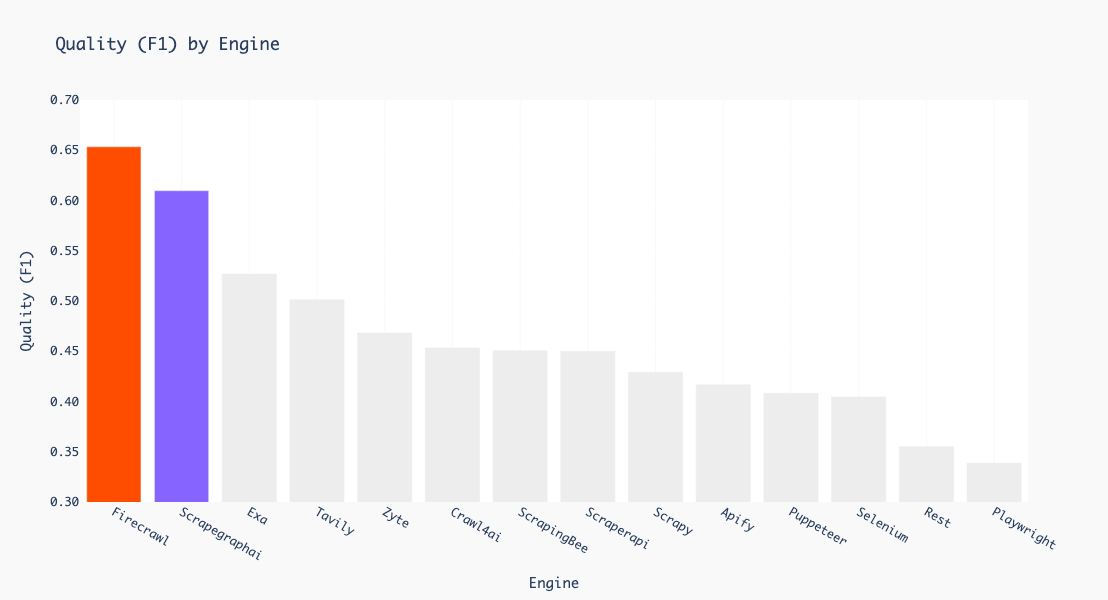

In [8]:
# Quality (F1) Bar Chart (vertical, best on the left)
df_sorted_f1 = df.sort_values("avg_f1", ascending=False)
color_map_f1 = {engine: colors_engines_map.get(engine, "#EDEDED") for engine in df_sorted_f1["engine_name"]}

fig_f1 = px.bar(
    df_sorted_f1,
    x="engine_name",
    y="avg_f1",
    color="engine_name",
    color_discrete_map=color_map_f1,
    title="Quality (F1) by Engine",
)

fig_f1.update_layout(
    xaxis_title="Engine",
    yaxis_title="Quality (F1)",
    showlegend=False,
    width=800,
    height=600,
    plot_bgcolor="#FFFFFF",
    paper_bgcolor="#F9F9F9",
    yaxis_range=[0.3, 0.7],
    xaxis=dict(
        gridcolor="#F9F9F9",
        tickfont=dict(family="'Geist Mono', 'SF Mono', 'Monaco', 'Inconsolata', 'Roboto Mono', monospace"),
        categoryorder="array",
        categoryarray=df_sorted_f1["engine_name"].tolist(),
    ),
    yaxis=dict(tickfont=dict(family="'Geist Mono', 'SF Mono', 'Monaco', 'Inconsolata', 'Roboto Mono', monospace"), tickformat=".2f"),
    font=dict(family="'Geist Mono', 'SF Mono', 'Monaco', 'Inconsolata', 'Roboto Mono', monospace", size=12),
)

fig_f1.show()


#### Summary Table


In [9]:
# Display summary table with key metrics
summary_df = df[['engine_name', 'success_perc', 'avg_f1', 'avg_recall', 'avg_precision']].sort_values('success_perc', ascending=False)
summary_df.columns = ['Engine', 'Coverage (Success Rate %)', 'Quality (F1)', 'Recall', 'Precision']
summary_df


,Engine,Coverage (Success Rate %),Quality (F1),Recall,Precision
13,Scrapegraphai,82.500000,0.609701,0.612683,0.612705
3,Firecrawl,81.600000,0.653395,0.654014,0.658862
5,Exa,76.300000,0.526801,0.506211,0.561197
8,Tavily,67.600000,0.501143,0.498865,0.508261
2,Scraperapi,63.513514,0.449829,0.442166,0.466340
4,Zyte,62.878788,0.468174,0.457769,0.487554
12,ScrapingBee,60.640732,0.450543,0.443617,0.466697
9,Apify,60.215054,0.416620,0.408899,0.430915
10,Crawl4ai,58.000000,0.453349,0.442768,0.472855
11,Selenium,55.040323,0.404574,0.396912,0.419732
